## P. VAISHNAVI
Here,
From the given dataset of Skills..
Problem Statement 1: Extract Top 10 data scientists whose skills are "Python, R and Deep Learning"
Problem Statement 2: Extract Top 10 web developers whose skills are "PHP, MySQL, HTML, CSS, JavaScript"

Dataset : "ml_sample_dataset.csv"
Libraries used : numpy, matplotlib, pandas, sklearn
Algorithms used: clustering - KMEANS

---------------------------------------------------------------------------------------------------------

Expected Output at cell no.:54, 63

In [ ]:
# importing libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
# reading csv (comma seperated value) file using pandas

In [28]:
data = pd.read_csv('ml_sample_dataset.csv')
data.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [ ]:
# dropping unneccesary columns, data cleaning.

In [29]:
data1 = data.drop(["Degree","Unnamed: 10", "Other skills", "Stream", "Performance_PG", "Performance_UG", "Performance_12", "Performance_10","Current Year Of Graduation"], axis = 1)
data1.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3)
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,0,2,0,0,0
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,0,0,0,0,0
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,0,0,0,0,0
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,0,0,0,0,0
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,0,0,2,2,2


In [30]:
# renaming the columns
data2 = data1.rename(columns={"Python (out of 3)": "Python", "R Programming (out of 3)": "R Programming", "Deep Learning (out of 3)":"Deep Learning", "PHP (out of 3)":"PHP", "MySQL (out of 3)":"MySQL", "HTML (out of 3)":"HTML", "CSS (out of 3)":"CSS", "JavaScript (out of 3)":"JavaScript", "AJAX (out of 3)":"AJAX", "Bootstrap (out of 3)": "Bootstrap", "MongoDB (out of 3)":"MongoDB", "Node.js (out of 3)":"Node.js", "ReactJS (out of 3)":"ReactJS"})
data2.head()

,Application_ID,Current City,Python,R Programming,Deep Learning,PHP,MySQL,HTML,CSS,JavaScript,AJAX,Bootstrap,MongoDB,Node.js,ReactJS
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,0,2,0,0,0
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,0,0,0,0,0
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,0,0,0,0,0
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,0,0,0,0,0
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,0,0,2,2,2


In [ ]:
#extraction of data for datascientists whose skills are Python, R, Deep Learning.
#Also add Application id to have clear idea on data

In [31]:
df3 = data2.loc[:,["Application_ID", "Python", "R Programming", "Deep Learning"]]
df3.head()


,Application_ID,Python,R Programming,Deep Learning
0,ML0001,0,2,0
1,ML0002,2,0,0
2,ML0003,3,0,1
3,ML0004,2,0,2
4,ML0005,2,0,0


In [32]:
X = data1.iloc[:, [2,3,4]].values
X

array([[0, 2, 0],
       [2, 0, 0],
       [3, 0, 1],
       ...,
       [1, 0, 0],
       [2, 2, 0],
       [2, 3, 0]], dtype=int64)

In [ ]:
#Clustering the data
#In order to cluster the data, we have to plot the elbow method graph and find the number of clusters
#Elbow method:  the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


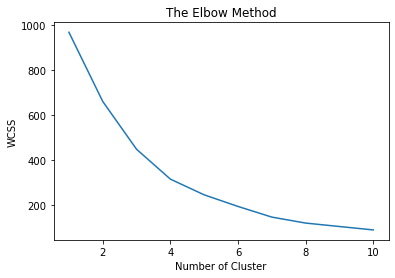

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')                                
plt.ylabel('WCSS')
plt.show()

In [ ]:
# From the graph above, the bend(elbow shape) can be seen at n = 4 (no. of clusters)

In [34]:
kmeans=KMeans(n_clusters=4,random_state=42).fit(X)

In [35]:
y_kmeans=kmeans.predict(X)
y_kmeans

array([1, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 3, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1,
       0, 3, 0, 0, 0, 3, 0, 3, 1, 0, 2, 3, 3, 2, 0, 3, 2, 0, 1, 2, 1, 1,
       0, 3, 2, 3, 0, 0, 2, 0, 3, 2, 1, 3, 2, 0, 2, 0, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 3, 0, 0, 2, 1, 1, 3, 0, 1, 0, 0, 3,
       2, 2, 3, 0, 0, 3, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 2, 3, 0, 0, 1, 2, 3, 0, 0, 2, 2, 3, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 2, 3, 0, 2, 1, 3, 1, 0, 0, 3, 3, 2, 2, 1, 0, 0,
       3, 0, 0, 2, 0, 3, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 3,
       3, 3, 3, 3, 0, 0, 3, 1, 1, 2, 3, 0, 0, 3, 0, 3, 1, 2, 0, 0, 2, 3,
       1, 0, 2, 0, 2, 1, 0, 3, 0, 2, 0, 0, 2, 2, 0, 0, 3, 3, 2, 1, 3, 1,
       1, 2, 0, 3, 0, 0, 2, 2, 2, 2, 0, 3, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1,
       2, 3, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 0, 2, 2, 0, 1, 1,
       2, 2, 2, 3, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 3, 2, 1, 1, 1, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 3, 2, 2, 2, 1,

In [ ]:
#adding a column "data scientists" which denotes the data which cluster it belongs to.

In [47]:
df3['data scientists'] = y_kmeans
df3.head(25)

,Application_ID,Python,R Programming,Deep Learning,data scientists
data scientists,,,,,
good in python and deep learning,ML0001,0,2,0,1
Basic python and R,ML0002,2,0,0,0
Basic python and R,ML0003,3,0,1,0
"Basic python,R,DL",ML0004,2,0,2,3
Basic python and R,ML0005,2,0,0,0
Basic python and R,ML0006,2,0,0,0
good in python and R,ML0007,1,0,0,2
Basic python and R,ML0008,3,1,0,0
Basic python and R,ML0009,3,0,0,0


In [ ]:
#Renaming the cluster with appropriate name.

In [48]:
df3["data scientists"].replace(0, "Basic python and R", inplace = True)
df3["data scientists"].replace(1, "good in R", inplace = True)
df3["data scientists"].replace(2, "good in python and R", inplace = True)
df3["data scientists"].replace(3, "good in python and deep learning", inplace = True)
df3.head()

,Application_ID,Python,R Programming,Deep Learning,data scientists
data scientists,,,,,
good in python and deep learning,ML0001,0,2,0,good in R
Basic python and R,ML0002,2,0,0,Basic python and R
Basic python and R,ML0003,3,0,1,Basic python and R
"Basic python,R,DL",ML0004,2,0,2,good in python and deep learning
Basic python and R,ML0005,2,0,0,Basic python and R


In [ ]:
#In order to extract data who are good in python and deep learning, set the "data scientists" column as index

In [49]:
df3=df3.set_index("data scientists")
df3.head(20)

,Application_ID,Python,R Programming,Deep Learning
data scientists,,,,
good in R,ML0001,0,2,0
Basic python and R,ML0002,2,0,0
Basic python and R,ML0003,3,0,1
good in python and deep learning,ML0004,2,0,2
Basic python and R,ML0005,2,0,0
Basic python and R,ML0006,2,0,0
good in python and R,ML0007,1,0,0
Basic python and R,ML0008,3,1,0
Basic python and R,ML0009,3,0,0


In [51]:
id=df3.loc["good in python and deep learning",["Application_ID","Python","R Programming","Deep Learning"]]
id.head()

,Application_ID,Python,R Programming,Deep Learning
data scientists,,,,
good in python and deep learning,ML0004,2,0,2
good in python and deep learning,ML0010,2,0,2
good in python and deep learning,ML0012,3,0,2
good in python and deep learning,ML0024,2,0,2
good in python and deep learning,ML0028,2,0,2


In [ ]:
# Rank denotes the sum of all three skills' rank
# Rank of each application id is added to the data set as a column "Rank"

In [52]:
id["Rank"] = id["Python"]+id["R Programming"]+id["Deep Learning"]
id.head(20)

,Application_ID,Python,R Programming,Deep Learning,Rank
data scientists,,,,,
good in python and deep learning,ML0004,2,0,2,4
good in python and deep learning,ML0010,2,0,2,4
good in python and deep learning,ML0012,3,0,2,5
good in python and deep learning,ML0024,2,0,2,4
good in python and deep learning,ML0028,2,0,2,4
good in python and deep learning,ML0030,2,2,2,6
good in python and deep learning,ML0034,3,2,2,7
good in python and deep learning,ML0035,3,3,3,9
good in python and deep learning,ML0038,2,0,2,4


In [ ]:
#Resetting the index

In [53]:
id=id.reset_index()
id.head()

,data scientists,Application_ID,Python,R Programming,Deep Learning,Rank
0,good in python and deep learning,ML0004,2,0,2,4
1,good in python and deep learning,ML0010,2,0,2,4
2,good in python and deep learning,ML0012,3,0,2,5
3,good in python and deep learning,ML0024,2,0,2,4
4,good in python and deep learning,ML0028,2,0,2,4


In [ ]:
# 1) sort the data in descending order (with higher rank, first)
# 2) Extract top 10 data as top 10 datascientists

In [54]:
Top_10 = id.sort_values(by="Rank", ascending=False)
print("Top 10 Data Scientist's IDs are: ")
print(Top_10.head(10))

#to_string(index=False) <<-- I added this to remove the index values of Application_ID

Top 10 Data Scientist's IDs are: 
                     data scientists Application_ID  Python  R Programming  \
14  good in python and deep learning         ML0077       3              3   
7   good in python and deep learning         ML0035       3              3   
21  good in python and deep learning         ML0125       3              2   
45  good in python and deep learning         ML0255       2              3   
28  good in python and deep learning         ML0176       2              2   
52  good in python and deep learning         ML0345       2              2   
6   good in python and deep learning         ML0034       3              2   
41  good in python and deep learning         ML0219       3              2   
32  good in python and deep learning         ML0180       2              2   
33  good in python and deep learning         ML0183       2              2   

    Deep Learning  Rank  
14              3     9  
7               3     9  
21              3     8  
45 

# TOP 10 - Web Developers

In [ ]:
# For Web developers, say the required skills are php, mysql, html, css, javascript

In [56]:
df4 = data2.loc[:,["Application_ID", "PHP", "MySQL", "HTML", "CSS", "JavaScript"]]
df4.head()

,Application_ID,PHP,MySQL,HTML,CSS,JavaScript
0,ML0001,2,0,2,3,2
1,ML0002,2,2,2,2,2
2,ML0003,2,2,2,0,2
3,ML0004,1,0,2,0,0
4,ML0005,2,0,2,1,1


In [57]:
X = df4.iloc[:, [1,2,3,4,5]].values
X

array([[2, 0, 2, 3, 2],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 0, 2],
       ...,
       [0, 0, 2, 2, 1],
       [0, 0, 0, 0, 0],
       [2, 0, 2, 2, 3]], dtype=int64)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


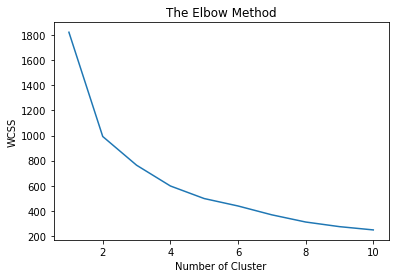

In [58]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')                                
plt.ylabel('WCSS')
plt.show()
#elbow method shows the no. of clusters = 2

In [59]:
kmeans=KMeans(n_clusters=2,random_state=42).fit(X)
y_kmeans=kmeans.predict(X)
y_kmeans

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [60]:
df4['web developers'] = y_kmeans
df4.head(20)

,Application_ID,PHP,MySQL,HTML,CSS,JavaScript,web developers
0,ML0001,2,0,2,3,2,0
1,ML0002,2,2,2,2,2,0
2,ML0003,2,2,2,0,2,0
3,ML0004,1,0,2,0,0,1
4,ML0005,2,0,2,1,1,0
5,ML0006,1,0,3,2,1,0
6,ML0007,0,0,0,0,0,1
7,ML0008,0,0,2,0,0,1
8,ML0009,0,0,2,2,0,0
9,ML0010,0,0,2,2,2,0


In [61]:
#since there are only clusters rename it as appropriate
# 0 - has the data who are not skilled in many of it
# 1 - has the data who are skilled in most of them
# rename them as basic level and skilled web developers

----------------------------------------------------------------------------------------------

df4["web developers"].replace(0, "Skilled web developers", inplace = True)
df4["web developers"].replace(1, "basic level web developers", inplace = True)
df4.head()

,Application_ID,PHP,MySQL,HTML,CSS,JavaScript,web developers
0,ML0001,2,0,2,3,2,Skilled web developers
1,ML0002,2,2,2,2,2,Skilled web developers
2,ML0003,2,2,2,0,2,Skilled web developers
3,ML0004,1,0,2,0,0,basic level web developers
4,ML0005,2,0,2,1,1,Skilled web developers


In [ ]:
# Extract the data who are skilled web developers and their skills with application_id

In [62]:
df4=df4.set_index("web developers")
wd=df4.loc["Skilled web developers",["Application_ID","PHP","MySQL","HTML","CSS","JavaScript"]]
wd.head()

,Application_ID,PHP,MySQL,HTML,CSS,JavaScript
web developers,,,,,,
Skilled web developers,ML0001,2,0,2,3,2
Skilled web developers,ML0002,2,2,2,2,2
Skilled web developers,ML0003,2,2,2,0,2
Skilled web developers,ML0005,2,0,2,1,1
Skilled web developers,ML0006,1,0,3,2,1


In [ ]:
# 1) add a column "Rank" which denotes the sum of skills 
# 2) sort the new data in descending order (highest rank comes first)
# 3) Extract Top 10 rows as "Top 10 Web Developers"

In [63]:
wd["Rank"]=wd["PHP"]+wd["MySQL"]+wd["HTML"]+wd["CSS"]+wd["JavaScript"]
Top_10 = wd.sort_values(by="Rank", ascending=False)
print("Top 10 Web Developer's IDs are: ")
print(Top_10["Application_ID"].head(10).to_string(index=False))

Top 10 Web Developer's IDs are: 
web developers
ML0067
ML0287
ML0310
ML0090
ML0159
ML0183
ML0241
ML0207
ML0021
ML0140


In [64]:
#printing this for showing the rank of Top 10
print(Top_10.head(10))

                       Application_ID  PHP  MySQL  HTML  CSS  JavaScript  Rank
web developers                                                                
Skilled web developers         ML0067    2      3     3    3           3    14
Skilled web developers         ML0287    2      3     3    3           3    14
Skilled web developers         ML0310    2      3     3    3           3    14
Skilled web developers         ML0090    2      3     3    3           3    14
Skilled web developers         ML0159    2      3     3    2           2    12
Skilled web developers         ML0183    2      3     3    2           2    12
Skilled web developers         ML0241    2      2     3    3           2    12
Skilled web developers         ML0207    2      3     3    2           2    12
Skilled web developers         ML0021    2      2     3    3           2    12
Skilled web developers         ML0140    2      2     3    3           2    12
